In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras import *
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from skimage import io
import os
import matplotlib.pyplot
from matplotlib.pyplot import imread
import skimage.transform
from skimage.transform import resize as imresize
from keras import regularizers
import csv
import time
import cv2

IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
IMAGE_DIMENSIONS = (IMAGE_HEIGHT, IMAGE_WIDTH)

TRENING_PUTANJA = './fruits-360/Train'
VALIDACIONA_PUTANJA = './fruits-360/Test'

# kao parametar prima putanju do folder-a dataset-a
def ucitajSlikeIzFoldera(putanja):
    slike = []
    labele = []
    idx_mapa = []
    idx = -1

    subfolderi = os.listdir(putanja)

    for naziv_klase in subfolderi:
        putanja_do_slika = os.path.join(putanja, naziv_klase)
        labele.append(naziv_klase)

        idx = idx + 1
        
        for naziv_slike in os.listdir(putanja_do_slika):
            putanja_do_slike = os.path.join(putanja_do_slika, naziv_slike)
            slika = cv2.imread(putanja_do_slike)
            slika = cv2.resize(slika, IMAGE_DIMENSIONS)
            slika = cv2.cvtColor(slika, cv2.COLOR_RGB2BGR)
            slike.append(slika)
            
            #punim array koji mapira sliku na index labele
            idx_mapa.append(idx)
            
    return np.array(slike), np.array(idx_mapa), labele

start = time.time()
X_train, y_train, labele = ucitajSlikeIzFoldera(TRENING_PUTANJA)
end = time.time()
print("Ucitavanje %d slika je trajalo %d s" % (len(y_train),end-start))

start = time.time()
X_test, y_test, unused = ucitajSlikeIzFoldera(VALIDACIONA_PUTANJA)
end = time.time()
print("Ucitavanje %d slika je trajalo %d s" % (len(y_test),end-start))

X_val, X_test , y_val, y_test = train_test_split(X_test, y_test, test_size = 0.66, random_state = 0)



Ucitavanje 7695 slika je trajalo 7 s
Ucitavanje 2576 slika je trajalo 2 s


In [8]:
Y_train = np_utils.to_categorical(y_train, 15)
Y_val = np_utils.to_categorical(y_val, 15)
Y_test = np_utils.to_categorical(y_test, 15)


In [9]:
tf.disable_v2_behavior()
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(16, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

# Fully connected layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(15))

model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
history = model.fit(X_train,Y_train, epochs=5, batch_size = 64, validation_data=(X_val,Y_val))


W0706 17:50:39.331725  7248 deprecation.py:323] From c:\users\savak\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7695 samples, validate on 875 samples
Epoch 1/5
7695/7695 [==============================] - 155s 20ms/step - loss: 0.1465 - acc: 0.9626 - val_loss: 0.0308 - val_acc: 0.9874
Epoch 2/5
7695/7695 [==============================] - 151s 20ms/step - loss: 0.0087 - acc: 0.9995 - val_loss: 0.0120 - val_acc: 0.9943
Epoch 3/5
7695/7695 [==============================] - 154s 20ms/step - loss: 0.0131 - acc: 0.9975 - val_loss: 0.0433 - val_acc: 0.9863
Epoch 4/5
7695/7695 [==============================] - 151s 20ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 5/5
7695/7695 [==============================] - 152s 20ms/step - loss: 0.0018 - acc: 0.9997 - val_loss: 0.0118 - val_acc: 0.9931


In [10]:
score = model.evaluate(X_test, Y_test)
print()
print('Test loss: ', score[0])
print('Test Accuracy', score[1])

1701/1701 [==============================] - 8s 4ms/step

Test loss:  0.00782042660290348
Test Accuracy 0.9952968841857731


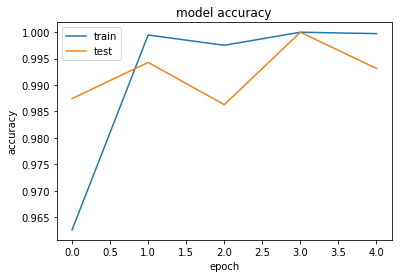

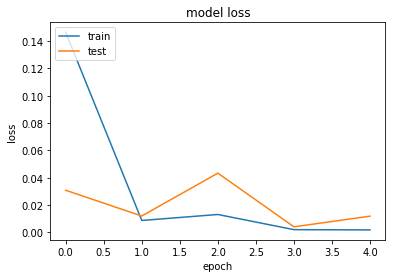

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()